## Problem Description
The data science firm you are working for has embarked on a challenging initiative aimed at enhancing our understanding of forest ecosystems through data-driven insights. As part of this initiative, you have been tasked with analyzing the [Covertype dataset](https://www.openml.org/d/180), a comprehensive collection of cartographic variables designed to predict forest cover types. This dataset represents a unique intersection of geographical information science and ecology, offering a detailed snapshot of various forest regions without relying on remotely sensed data.

Imagine a scenario where accurate prediction of forest cover types can significantly influence conservation efforts, land management strategies, and our overall understanding of forest ecosystems. Your model's predictions could help identify critical areas for conservation, optimize land use planning, and contribute to sustainable forest management practices. 
Your primary objective is to develop a predictive model typically Decision Trees followed by SVMs, capable of *accurately* classifying the forest cover type using Support Vector Machines. This classification challenge is central to understanding the distribution of different forest types and their relation to ecological and geographical factors.


### Dataset Overview
The Covertype dataset encapsulates the actual forest cover type for given observations within 30 x 30 meter cells, as determined from the US Forest Service (USFS) Region 2 Resource Information System (RIS) data. The independent variables, derived from data originally obtained from the US Geological Survey (USGS) and USFS, span both quantitative measures (such as elevation and distance to water features) and qualitative variables (including wilderness areas and soil types). The data is in its raw form, featuring binary columns for qualitative variables and presents a real challenge for predictive modeling.

The dataset covers four wilderness areas in the Roosevelt National Forest of northern Colorado, characterized by minimal human disturbances. These areas—Neota, Rawah, Comanche Peak, and Cache la Poudre—differ significantly in elevation, forest management practices, and primary tree species, from spruce/fir to lodgepole pine and Ponderosa pine, among others.

## Assignment 5 : Decision Trees (Multiclass Classification)


In [5]:
# Auto-setup when running on Google Colab
if 'google.colab' in str(get_ipython()):
    !pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as openml
from matplotlib import cm
import seaborn as sns

In [6]:
# Download Covertype data. Takes a while the first time.
covertype = openml.datasets.get_dataset(180)
X, y, _, _ = covertype.get_data(target=covertype.default_target_attribute, dataset_format='array'); 
classes = covertype.retrieve_class_labels()
features = [f.name for i,f in covertype.features.items()][:-1]

/var/folders/bs/qy9ssxdj1zg35_516gt13v7m0000gn/T/ipykernel_90537/2047245719.py:2: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  covertype = openml.datasets.get_dataset(180)
/var/folders/bs/qy9ssxdj1zg35_516gt13v7m0000gn/T/ipykernel_90537/2047245719.py:3: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, _ = covertype.get_data(target=covertype.default_target_attribute, dataset_format='array');


In [3]:
classes

['Aspen',
 'Cottonwood_Willow',
 'Douglas_fir',
 'Krummholz',
 'Lodgepole_Pine',
 'Ponderosa_Pine',
 'Spruce_Fir']

In [4]:
features

['elevation',
 'aspect',
 'slope',
 'horizontal_distance_to_hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'wilderness_area1',
 'wilderness_area2',
 'wilderness_area3',
 'wilderness_area4',
 'soil_type_1',
 'soil_type_2',
 'soil_type_3',
 'soil_type_4',
 'soil_type_5',
 'soil_type_6',
 'soil_type_7',
 'soil_type_8',
 'soil_type_9',
 'soil_type_10',
 'soil_type_11',
 'soil_type_12',
 'soil_type_13',
 'soil_type_14',
 'soil_type_15',
 'soil_type_16',
 'soil_type_17',
 'soil_type_18',
 'soil_type_19',
 'soil_type_20',
 'soil_type_21',
 'soil_type_22',
 'soil_type_23',
 'soil_type_24',
 'soil_type_25',
 'soil_type_26',
 'soil_type_27',
 'soil_type_28',
 'soil_type_29',
 'soil_type_30',
 'soil_type_31',
 'soil_type_32',
 'soil_type_33',
 'soil_type_34',
 'soil_type_35',
 'soil_type_36',
 'soil_type_37',
 'soil_type_38',
 'soil_type_39',
 'soil_type_40']

In [5]:
n_points = int(X.shape[0] / 3)
random_indices = np.random.choice(X.shape[0], size=n_points, replace=False)
random_indices

array([73691, 70215, 92815, ..., 86987, 64380, 97797])

/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.

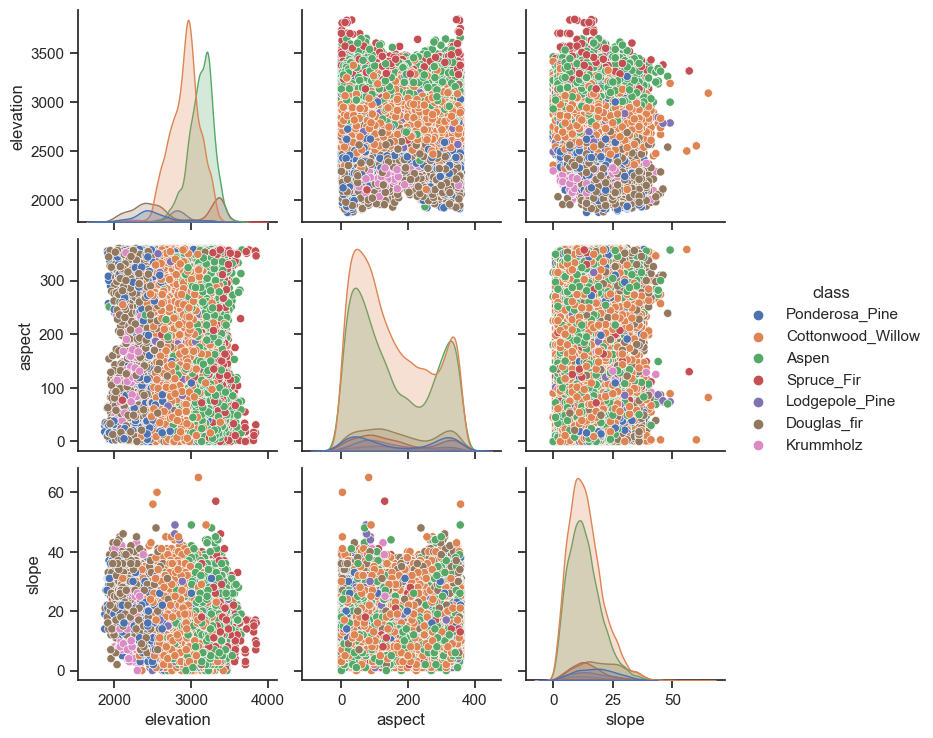

In [6]:
# Assuming X, y, features, and classes are defined
n_points = int(X.shape[0] / 3)

# Randomly sample indices
random_indices = np.random.choice(X.shape[0], size=n_points, replace=False)

# Create DataFrame from the sampled points
df = pd.DataFrame(X[random_indices, :3], columns=features[:3])
df['class'] = [classes[i] for i in y[random_indices]]

# Setting the visual style of the seaborn plots
sns.set(style="ticks")

# Create the pairplot
sns.pairplot(df, hue="class");

In [7]:
df

,elevation,aspect,slope,class
0,3152.0,105.0,13.0,Ponderosa_Pine
1,2742.0,58.0,15.0,Cottonwood_Willow
2,3290.0,53.0,23.0,Aspen
3,3209.0,26.0,16.0,Cottonwood_Willow
4,3265.0,69.0,23.0,Spruce_Fir
...,...,...,...,...
36792,2543.0,9.0,17.0,Cottonwood_Willow
36793,2732.0,84.0,22.0,Cottonwood_Willow
36794,2622.0,16.0,14.0,Ponderosa_Pine
36795,2791.0,89.0,25.0,Cottonwood_Willow


### Task 1 : Data Preperation
Given the above dataset features `X` and targets `y`, prepare train sets `X_train`, `y_train` and test sets `X_test`, `y_test` based on a `70-30` hold-out split using `train_test_split`. Set the `random_state = 42`.

In [8]:
## Data Preperation 
from sklearn.model_selection import train_test_split

## Write your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [9]:
from collections import Counter
Counter(y_train)

Counter({1: 36209, 0: 27177, 2: 5196, 6: 3140, 5: 2797, 4: 1831, 3: 925})


### Receiver Operating Characteristics (ROC)
The ROC AUC (Receiver Operating Characteristic - Area Under Curve) is a performance measurement for classification problems at various threshold settings. The ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

1. **ROC Curve**: The ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The curve is created by plotting the true positive rate (TPR, also known as recall) against the false positive rate (FPR, where FPR = 1 - specificity) at various threshold settings.

2. **True Positive Rate (TPR)**: It indicates the proportion of actual positive cases which are correctly identified by the model.

3. **False Positive Rate (FPR)**: It indicates the proportion of negative cases that are incorrectly classified as positive.

4. **AUC - Area Under the ROC Curve**: The AUC provides an aggregate measure of performance across all possible classification thresholds. It can be interpreted as the probability that the model ranks a random positive example more highly than a random negative example.

5. **AUC Value**:
   - An AUC of 1.0 is a perfect score, meaning that the model has perfect discrimination.
   - An AUC of 0.5 suggests no discrimination ability, equivalent to random guessing.
   - An AUC less than 0.5 suggests worse than random guessing, indicating a problem with the model.
   - Values between 0.5 and 1.0 indicate varying levels of performance, with values closer to 1.0 representing a better model.

6. **Advantages of ROC AUC**:
   - It is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
   - It is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is used.

However, ROC AUC might be too optimistic if the dataset is imbalanced, i.e., there is a large skew in the class distribution. In such cases, other metrics like Precision-Recall AUC might be more informative.


- Trade off _true positive rate_ $\textit{TPR}= \frac{TP}{TP + FN}$ with _false positive rate_ $\textit{FPR} = \frac{FP}{FP + TN}$
- Plotting TPR against FPR _for all possible thresholds_ yields a _Receiver Operating Characteristics curve_
    - Change the treshold until you find a sweet spot in the TPR-FPR trade-off
    - Lower thresholds yield higher TPR (recall), higher FPR, and vice versa



In multi-class classification problems, ROC curves and AUC (Area Under the Curve) can be extended beyond the binary classification setting in mainly two ways: one-vs-rest (OVR) and one-vs-one (OVO). These strategies allow us to use ROC AUC in scenarios where we have more than two classes.

##### ROC OVR (One-vs-Rest):
- **Approach**: In the one-vs-rest approach, a separate binary classification problem is created for each class, where one class is considered the positive class and all others are combined into a single negative class. This results in as many binary classifiers as there are classes.
- **ROC Curve**: For each classifier, a ROC curve is plotted, which means you can end up with multiple ROC curves. The AUCs from these individual ROC curves can be averaged to get a single ROC AUC metric.
- **Suitability**: This method is suitable when the focus is on the performance of each class against all others, and when classes are imbalanced.

##### ROC OVO (One-vs-One):
- **Approach**: In the one-vs-one approach, a binary classification problem is created for every pair of classes. If you have N classes, you end up with N(N-1)/2 classifiers.
- **ROC Curve**: Each classifier’s performance is summarized in a ROC curve. These individual ROC curves’ AUCs are typically averaged to produce a single ROC AUC metric. Unlike OVR, this doesn’t consider each class against all others but rather each class against each other class separately.
- **Suitability**: This method is particularly useful when classes can be easily confused with one another and the dataset is balanced, as it focuses on the discriminative ability of every class against every other class.


In summary, the choice between ROC OVR and ROC OVO might depend on the specific problem at hand, the degree of class imbalance, and computational resources. Both approaches provide a way to evaluate multi-class classifiers using ROC curves and AUC, which are traditionally used for binary classification.

### Task 2 : Model Evaluation

**Instructions**:


- From the `sklearn.tree` library call the `DecisionTreeClassifier` constructor with default hyperparameters as `dtree_clf` and set `random_state = 2`. 
- Call `cross_validate` to perform $5-$ fold cross-validation on the training dataset `X_train` and `y_train`. Save the evaluations in `evals`.
- To evaluate and benchamrk the performance, we will use either the `roc_auc_ovr` or `roc_auc_ovo` metric. The choice completely depends on you but a *valid* justification is required for one of the choices. Take into consideration the class imbalance, number of samples as well as no of classes to make an informed decision regarding the evaluation metric.
- Extract the test and train scores across the 5 cross validation steps in the *arrays* `train_scores` and `test_scores` respectively. 
- Justify the choice of using `roc_auc_ovr` or `roc_auc_ovo` in the space below.
- After visualizing the performance, comment on the overfitting or underfiitting bature of the model along with the extent of it.

In [10]:
##Model Fitting
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

##Write your code here:
dtree_clf = DecisionTreeClassifier()

xvals = cross_validate(dtree_clf, X_train, y_train, return_train_score = True, n_jobs = -1, cv=5)


train_scores = xvals['train_score']
test_scores = xvals['test_score']

print(f'Mean of train scores is {round(np.mean(train_scores),2)}')
print(f'Mean of test scores is {round(np.mean(test_scores),2)}')


Mean of train scores is 0.99
Mean of test scores is 0.79


#### Write justification for your evaluation metric here:

Text : overfitting






/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

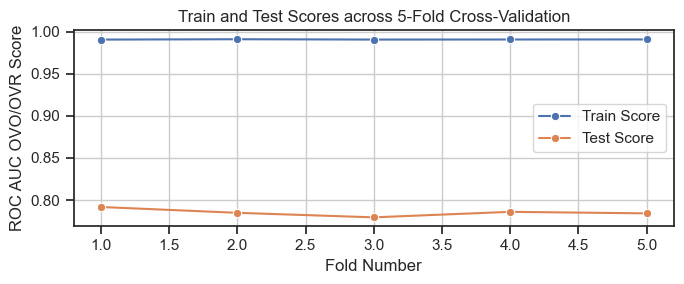

In [11]:
##Visualizing the performance
folds = np.arange(1, len(test_scores) + 1)

# Create a line plot for train and test scores
plt.figure(figsize=(7, 3))
sns.lineplot(x=folds, y=train_scores, marker='o', label='Train Score')
sns.lineplot(x=folds, y=test_scores, marker='o', label='Test Score')

# Adding plot details
plt.title('Train and Test Scores across 5-Fold Cross-Validation')
plt.xlabel('Fold Number')
plt.ylabel('ROC AUC OVO/OVR Score')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

#### Write your analysis on the learning behavior (overfitting and underfitting) of the model:

Text : The model is overfitting, becuase train score is much higher than test score


###### Solution
The model seems to slightly overfit. Although the estimation bias error seems to be quite low. Moreover, looking at the variance in the performance of the models across different time-steos we observe little variability in the test as well as the train scores.


### Task 3 : Hyperparameter Optimsation using Grid Search

Given your analysis regarding the leraning behavior of the model we will evaluate and benchmark the performance of the model in different settings. Based on this analysis across ranges of hyperparameters, we will select the set of most *optimal* hyperparameters that lead to the highest performance of the model on a given evaluation metric.

For the `DecisionTreeClassifier` we will tune the `criterion`, `min_sample_split` and `min_samples_leaf` hyperparameters.
Tuning hyperparameters is a crucial step in optimizing machine learning models. For the `DecisionTreeClassifier` in Scikit-Learn, the hyperparameters you're interested in are `criterion`, `min_samples_split`, and `min_samples_leaf`. Here are suitable ranges or sets of values for each that you can explore:

##### 1. `criterion`
The `criterion` hyperparameter defines the function used to measure the quality of a split. The decision tree classifier supports various functions for this purpose.

- **Options**: 
  - `'gini'`: For the Gini impurity. A measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
  - `'entropy'`: For the information gain. It measures the reduction in entropy or surprise by splitting a dataset according to a given value.

You can explore both options to see which criterion performs better for your given problem.

##### 2. `min_samples_split`
This hyperparameter represents the minimum number of samples required to split an internal node. Values too low can lead to overly complex trees (overfitting), while values too high can prevent the tree from adequately capturing the underlying patterns (underfitting).

- **Range**: 
  - Start with a value of 2 (the minimum value to split a node).
  - Depending on the size of your dataset, you can go up to a value that represents a small percentage of your total data, such as 10% or more. For very large datasets, even a larger threshold can be reasonable to prevent overfitting.

##### 3. `min_samples_leaf`
This parameter specifies the minimum number of samples required to be at a leaf node. Similar to `min_samples_split`, setting this value too low can lead to overfitting, while setting it too high can cause underfitting.

- **Range**:
  - Start with 1, which is the minimum value to form a leaf.
  - Consider increasing this value up to a small percentage of your dataset size. The exact upper limit can vary, but values like 1%, 5%, or even 10% of your total number of instances in the dataset can be tested, especially for large datasets.

##### Practical Approach for Hyperparameter Tuning:
- **Small datasets**: You might afford to explore wider ranges with finer granularity because training models will be relatively quick.
- **Large datasets**: You might need to start with broader steps and possibly higher minimum values for `min_samples_split` and `min_samples_leaf` to keep the computational cost manageable.



**Instructions**:
- Prepare a hyperparameter grid `param_tree` comprising of the `criterion`, `min_sample_split` and `min_sample_leaf` hyperparameters as keys and their respective selected ranges as hyperparameters. The ranges should be specified using `np.linspace` or `np.geomspace` or `np.logspace` depending on the appropriate choice given the hyperparameter. The number of samples to be evaluated must be `num=10`.
- Perform `GridSearchCV` where you perform $3$-fold cross-validation. Ensure that the train scores are returned and you have set the parameter to enable the parallel processing of the model evaluations. Extract the evaluations in `grid_search`.
- Extract the results from the GridSearch using the `.cv_results_` method into a dataframe `results_df`.
- Sort `results_df` on `rank_test_score` column.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
# Assuming X_train and y_train are already defined

# Correcting the parameter grid
param_trees = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.linspace(2, 50, num=10, dtype=int),
    'min_samples_leaf': np.linspace(2, 50, num=10, dtype=int)
}

# Initialize the classifier
dtree_clf = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(dtree_clf, param_grid=param_trees, cv=3)
# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 12}
Best score: 0.788146218864985


In [13]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.520044,0.019042,0.005310,0.000520,gini,2,2,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.788423,0.779447,0.780767,0.782879,0.003957,9
1,0.497634,0.006692,0.004467,0.000081,gini,2,7,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.787026,0.784184,0.783329,0.784846,0.001580,3
2,0.496916,0.003094,0.004434,0.000109,gini,2,12,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.788074,0.783135,0.782204,0.784471,0.002576,4
3,0.487860,0.005379,0.004516,0.000056,gini,2,18,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.784891,0.781311,0.778127,0.781443,0.002763,11
4,0.485105,0.001606,0.004270,0.000058,gini,2,23,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.782406,0.779370,0.774128,0.778635,0.003419,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.369919,0.003615,0.003382,0.000023,entropy,50,28,"{'criterion': 'entropy', 'min_samples_leaf': 5...",0.731356,0.732161,0.738761,0.734093,0.003317,191
196,0.370851,0.004002,0.003394,0.000027,entropy,50,34,"{'criterion': 'entropy', 'min_samples_leaf': 5...",0.731356,0.732161,0.738761,0.734093,0.003317,191
197,0.371151,0.004121,0.003400,0.000011,entropy,50,39,"{'criterion': 'entropy', 'min_samples_leaf': 5...",0.731356,0.732161,0.738761,0.734093,0.003317,191
198,0.371065,0.003453,0.003400,0.000014,entropy,50,44,"{'criterion': 'entropy', 'min_samples_leaf': 5...",0.731356,0.732161,0.738761,0.734093,0.003317,191


In [64]:
results_df = results_df.sort_values(by='rank_test_score').reset_index()
results_df = results_df.drop(['index'], axis=1)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.524797,0.002264,0.004469,0.000055,entropy,2,12,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.790248,0.781660,0.791599,0.787836,0.004401,1
1,0.532789,0.005162,0.004466,0.000049,entropy,2,7,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.787259,0.777778,0.790706,0.785247,0.005466,2
2,0.498926,0.006782,0.004576,0.000049,gini,2,7,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.788229,0.784378,0.781621,0.784743,0.002710,3
3,0.493886,0.004944,0.004572,0.000252,gini,2,12,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.788695,0.783601,0.781854,0.784717,0.002902,4
4,0.496996,0.003292,0.004325,0.000047,entropy,7,12,"{'criterion': 'entropy', 'min_samples_leaf': 7...",0.782717,0.778088,0.789735,0.783513,0.004788,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.370151,0.003718,0.003453,0.000047,entropy,50,12,"{'criterion': 'entropy', 'min_samples_leaf': 5...",0.731356,0.732161,0.738761,0.734093,0.003317,191
196,0.370167,0.003013,0.003426,0.000041,entropy,50,7,"{'criterion': 'entropy', 'min_samples_leaf': 5...",0.731356,0.732161,0.738761,0.734093,0.003317,191
197,0.370221,0.003691,0.003444,0.000023,entropy,50,44,"{'criterion': 'entropy', 'min_samples_leaf': 5...",0.731356,0.732161,0.738761,0.734093,0.003317,191
198,0.369996,0.003278,0.003486,0.000031,entropy,50,18,"{'criterion': 'entropy', 'min_samples_leaf': 5...",0.731356,0.732161,0.738761,0.734093,0.003317,191


### Task 4 : Comparing Perfomances
Having performed the grid search cross validation and extrcating the *best* hyperparameters, we will initialize our classifier `dtree_clf` on those hyperparameter values and fit the training sets to perform $5$ fold cross validation. 

**Instructions**:
- Select the scoring or evaluation metric for the multiclass classification task (ovo or ovr)
- Analyze the learning the behavior (overfitting or underfitting) and compare with the model constructed in Task 2 and its behavior. Mention the effect of HPO.


/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

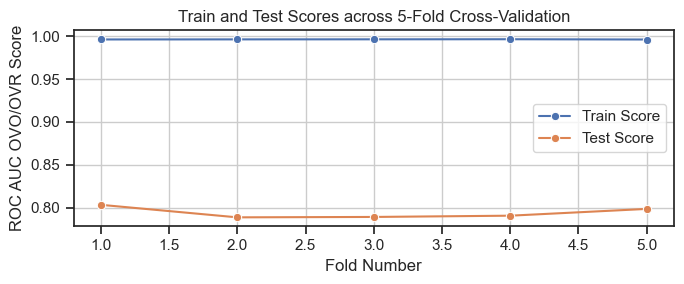

In [14]:
##Code to compare the performance with the baseline model

scoring = 'roc_auc_ovo'
best_params = results_df['params'][0]

dtree_clf = DecisionTreeClassifier(**best_params)

evals = cross_validate(dtree_clf, X_train, y_train, return_train_score= True, n_jobs = -1, cv=5, scoring = scoring)

test_scores = evals['test_score']
train_scores = evals['train_score']

##Visualizing the performance
folds = np.arange(1, len(test_scores) + 1)

# Create a line plot for train and test scores
plt.figure(figsize=(7, 3))
sns.lineplot(x=folds, y=train_scores, marker='o', label='Train Score')
sns.lineplot(x=folds, y=test_scores, marker='o', label='Test Score')

# Adding plot details
plt.title('Train and Test Scores across 5-Fold Cross-Validation')
plt.xlabel('Fold Number')
plt.ylabel('ROC AUC OVO/OVR Score')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

###### Write your analysis here:

After hyperparameter tuning, test_score is slightly increased than before. But still train score is higher than test score and it seems to ovefit. 

## Lab 5 : Support Vector Machines 



- Decision boundaries close to training points may generalize badly
    - Very similar (nearby) test point are classified as the other class
- Choose a boundary that is as far away from training points as possible
- The __support vectors__ are the training samples closest to the hyperplane
- The __margin__ is the distance between the separating hyperplane and the _support vectors_
- Hence, our objective is to _maximize the margin_
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/05_margin.png" alt="ml" style="width: 1250px;"/>

### Solving SVMs with Lagrange Multipliers
* Imagine a hyperplane (green) $y= \sum_1^p \mathbf{w}_i * \mathbf{x}_i + w_0$ that has slope $\mathbf{w}$, value '+1' for the positive (red) support vectors, and '-1' for the negative (blue) ones
    * Margin between the boundary and support vectors is $\frac{y-w_0}{||\mathbf{w}||}$, with $||\mathbf{w}|| = \sum_i^p w_i^2$
    * We want to find the weights that maximize $\frac{1}{||\mathbf{w}||}$. We can also do that by maximizing $\frac{1}{||\mathbf{w}||^2}$

First, let us look at linear SVMs. Check the [documentation of LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

The most important inputs are:  
* C -- The C hyperparameter controls the misclassification cost and therefore the amount of regularization. Lower values correspond to more regularization
* loss - The loss function, typically 'hinge' or 'squared_hinge'. Squared hinge is the default. Normal hinge is less strict.
* dual -- Whether to solve the primal optimization problem or the dual (default). The primal is recommended if you have many more data points than features (although our datasets is very small, so it won't matter much).

The most important outputs are:  
* decision_function - The function used to classify any point. In this case on linear SVMs, this corresponds to the learned hyperplane, or $y = \mathbf{wX} + b$. It can be evaluated at every point, if the result is positive the point is classified as the positive class and vice versa. 
* coef_ - The model coefficients, i.e. the weights $\mathbf{w}$
* intercept_ - the bias $b$

From the decision function we can find which points are support vectors and which are not: the support vectors are all
the points that fall inside the margin, i.e. have a decision value between -1 and 1, or that are misclassified. Also see the lecture slides.

In [5]:
from collections import Counter
Counter(y)

Counter({1: 51682, 0: 38906, 2: 7375, 6: 4508, 5: 3969, 4: 2614, 3: 1339})

### A High Level Analysis
From above we can see that there are 7 classes of different types of forest covers. Although, before we analyze and classify specific cover types, your stakeholder wants you to present a high level analysis for Coniferous Tress and Riparian Vegetaions found in the regions covered in the above dataset. After some domain specific study you find out more information on Coniferous Trees and Riparian Vegetation. 

- **Coniferous Trees**:These are primarily evergreen trees, which means they retain their needles year-round. They are adapted to a range of climatic conditions but are predominantly found in cooler and sometimes drier regions. These trees are known for their wood and sometimes for their sap products.
    - Species
        - **Douglas fir** (Pseudotsuga menziesii): Not a true fir but has similar habitat preferences and uses. It thrives in moist to dry conditions and is a dominant tree in many North American forests.
        - **Lodgepole Pine** (Pinus contorta): Known for its ability to quickly colonize disturbed areas and its adaptability to different environments, including both coastal and inland areas.
        - **Ponderosa Pine** (Pinus ponderosa): Prefers dry, mountainous regions and is notable for its thick bark and large size.
         - **Spruce_Fir**: This category likely refers to forests dominated by spruce and true fir species, which are common in cooler climates and higher altitudes. They are important timber trees and play key roles in their ecosystems.
         
         
- **Riparian Vegetation**:  This category includes species that are adapted to specific environmental niches such as high altitudes (montane) or areas adjacent to watercourses (riparian). These areas are characterized by distinct moisture and soil conditions, which support a diverse range of plant life.
    - Species
        - **Aspen**(Populus tremuloides and related species): Known for its fast growth and ability to quickly colonize open areas, aspen is often found in montane habitats. It thrives in well-drained soils and is notable for its beautiful fall foliage.
        - **Cottonwood Willow**:This pairing likely refers to the genus Populus (cottonwoods) and Salix (willows), which are commonly found in riparian zones. These species are adapted to moist, fertile soils along waterways and are crucial for stabilizing streambanks and supporting wildlife.
        - **Krummholz**:This term refers to a growth form rather than a specific species. Krummholz plants are stunted, shrubby trees found at the tree line where harsh conditions (like high winds and cold temperatures) prevent trees from developing into a typical forest structure. They represent a transition between forested areas and alpine vegetation zones



In [7]:
coniferous = ['Douglas_fir',
 'Lodgepole_Pine',
 'Ponderosa_Pine',
 'Spruce_Fir']

riparian = ['Aspen',
 'Cottonwood_Willow',
 'Krummholz',]

In [8]:
classes

['Aspen',
 'Cottonwood_Willow',
 'Douglas_fir',
 'Krummholz',
 'Lodgepole_Pine',
 'Ponderosa_Pine',
 'Spruce_Fir']

In [9]:
new_classes = ['coniferous', 'riparian']

### Task 1 : Categorization
Create a new target variable `y_new`. We need to capture the information whether a class belongs to Confiferous or Riperian Vegetaion. Instad of having 7 different classes, we would like to have just two classes *coniferous (1)* and *riperian(0)*. Convert the respective forest types (Douglus Fir, Krumholz etc) as Confireous and Ripearian by convering multiple (7) classess into 2 classess based on the domain study made above. Finally, the **array** `y_new` must be populated with binary values (0/1).

**Hint** : numbers in `y` correspond to the index value of the target labels in the list `classes`.

In [10]:
##Write your solution here:
y_new = [1 if classes[i] in coniferous else 0 for i in y]
y_new = np.array(y_new)


In [11]:
##Checking if we have correctly created new categories
print(Counter(y_new))
Counter(y_new)[0] + Counter(y_new)[1] == X.shape[0]

NameError: name 'Counter' is not defined

In [12]:
##Checking the size of the datasets
X.shape[0] == y_new.shape[0]

True

### Task 2: Exploratory Data Analysis

Visualize the distribution of data points given the elevation and slope features. After doing so, kindly write your brief analysis in 4-5 sentences regarding the charectaristic and nature of the data.

/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.

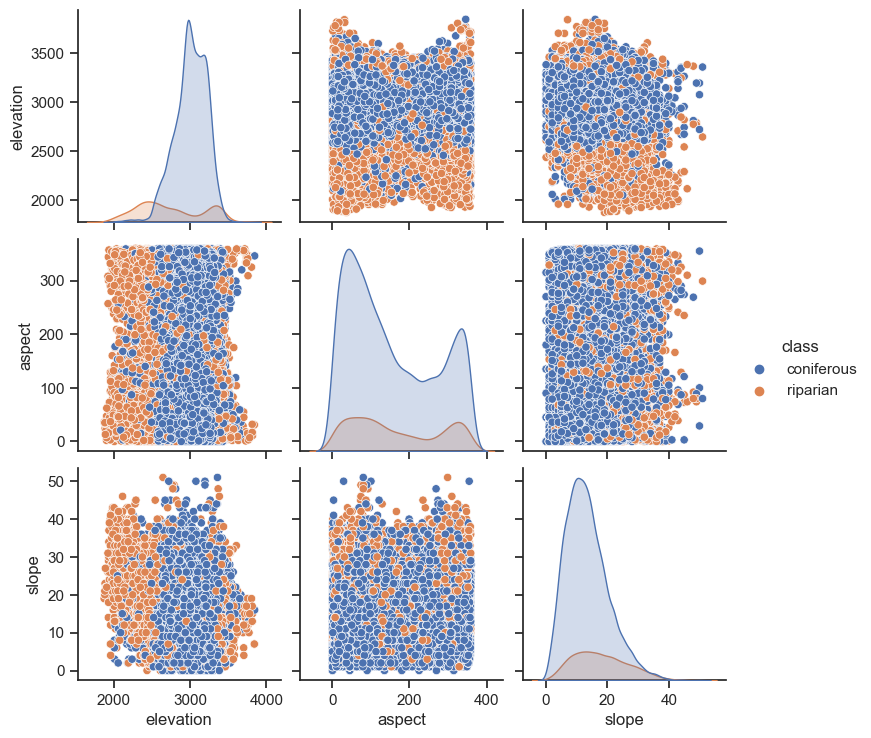

In [13]:
# Assuming X, y, features, and classes are defined
n_points = int(X.shape[0] / 3)

# Randomly sample indices
random_indices = np.random.choice(X.shape[0], size=n_points, replace=False)

# Create DataFrame from the sampled points
df = pd.DataFrame(X[random_indices, :3], columns=features[:3])
df['class'] = [new_classes[i] for i in y_new[random_indices]]

# Setting the visual style of the seaborn plots
sns.set(style="ticks")

# Create the pairplot
sns.pairplot(df, hue="class");

###### Analysis:

From the above graphs we observe that coniferous trees have a higher elevation on avergae than riparian trees. Also confierous trees are to be seen growing on steepy terrains where the slope of the ground is relatively high, while riparian trees are found on near flatlands possibly due to a close proximity to water bodies. 

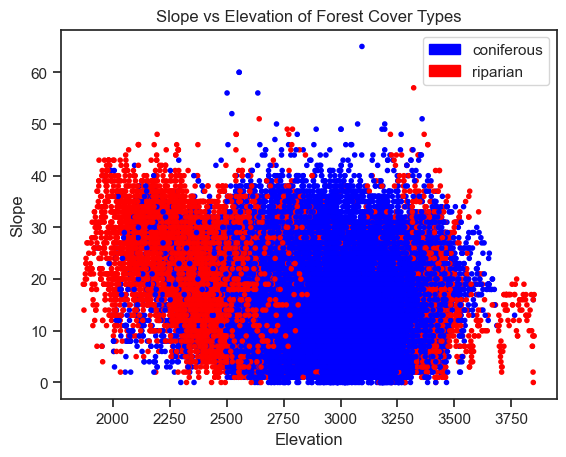

In [13]:
import matplotlib.patches as mpatches

## We will undertand how the data is distributed by looking at the elevation and slope of the forest covers.
## X[:,0] plots all samples correponding to the 'elevation' feature
## X[:,2] plots all samples correponding to the 'Slope' feature 

plt.scatter(X[:,0], X[:,2], c=y_new ,cmap=plt.cm.bwr, marker='.');
# Define patches for the legend
class_a_patch = mpatches.Patch(color='blue', label='coniferous')
class_b_patch = mpatches.Patch(color='red', label='riparian')
plt.xlabel('Elevation')
plt.ylabel('Slope')
plt.title('Slope vs Elevation of Forest Cover Types')

# Add legend to the plot
plt.legend(handles=[class_a_patch, class_b_patch])

plt.show()

##### write your analysis here

The coniferous trees are spread out more evenly at different heights, while the riparian plants are mostly found at lower heights. This shows that riparian vegetation is often seen near water, which is usually found at lower areas. The steepness of the land doesn't seem to affect the distribution much.


- **Elevation vs. Slope**: The coniferous class seems to have a more uniform distribution across all elevations, while the riparian class seems more concentrated at lower elevations. This suggests that riparian vegetation is more common at lower elevations, which makes sense as these areas are often closer to water sources. Slope does not seem to have a strong differential effect on the distribution of the two classes, though there's a slight indication that the riparian class may be less common on steeper slopes.

##### Overall Analysis:
- Coniferous areas cover a broad range of elevations, aspects, and slopes. This suggests a wide ecological niche or adaptability of coniferous trees.
- Riparian areas are more constrained to lower elevations and gentler slopes. This is consistent with the typical environmental conditions found in riparian zones, which are often flat areas adjacent to streams or rivers.

### Task 3 : Constructing a Baseline
We will now train a Support Vector Machine with a Linear kernel to capture the relationship between our features and forest type targets


**Instructions**:
- Create a train and test set based on a 70-30 hold out split using `train_test_split` on `X` and `y_new`.
- We need to scale the dataset. Use `StandardScaler` to scale the features using the `.fit_transform()` method to cretae `X_scaled_train`.
- Moreover, we would like to reduce the dimensionality of the dataset. So we perform a PCA transform. Since, we haven't covered PCA in the lectures yet, this step has been implemented for you.
- Train a LinearSVC `clf_1` with C=`0.001` and squared hinge loss, `max_iter = 10000` on `X_reduced` and `y_train`.
- Extract the support vectors from the decision function (hint : use the `.decision_function()` method from the [documentation of LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)).
    - Create an array `support_vector_indices`, where you store indices of all the samples in `X` such that the multiplication of `(2*y-1)` with `clf1_1.decision_function(X)` should be $\leq 1$.
    - Then, create another array `support_vectors` where you store the slices from `X` based on the aggregated indices in `support_vector_indices`.
    - **Hint**: how to compute the support vectors from the decision function (*ignore if you want to solve this yourself*)
        - `support_vector_indices = np.where((2 * y - 1) * clf_1.decision_function(X_reduced) <= 1)[0]`
        - `support_vectors = X_reduced[support_vector_indices]`
        - Note that we can also calculate the decision function manually with the formula $y = w*X$
        - `decision_function` `=` `np.dot(X, clf_1.coef_[0]) + clf_1.intercept_[0]`

In [14]:
# Plotting helpers. Based loosely on https://github.com/amueller/mglearn
def plot_svm_kernel(X, y, title, support_vectors, decision_function, dual_coef=None, show=True):
    """
    Visualizes the SVM model given the various outputs. It plots:
    * All the data point, color coded by class: blue or red
    * The support vectors, indicated by circling the points with a black border. 
      If the dual coefficients are known (only for kernel SVMs) if paints support vectors with high coefficients darker
    * The decision function as a blue-to-red gradient. It is white where the decision function is near 0.
    * The decision boundary as a full line, and the SVM margins (-1 and +1 values) as a dashed line
    
    Attributes:
    X -- The training data
    y -- The correct labels
    title -- The plot title
    support_vectors -- the list of the coordinates of the support vectores
    decision_function - The decision function returned by the SVM
    dual_coef -- The dual coefficients of all the support vectors (not relevant for LinearSVM)
    show -- whether to plot the figure already or not
    """
    # plot the line, the points, and the nearest vectors to the plane
    #plt.figure(fignum, figsize=(5, 5))
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.bwr, marker='.')
    if dual_coef is not None:
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c=dual_coef[0, :],
                    s=70, edgecolors='k', zorder=10, marker='.', cmap=plt.cm.bwr)
    else:
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none',
                    s=70, edgecolors='k', zorder=10, marker='.', cmap=plt.cm.bwr)
    plt.axis('tight')
    x_min, x_max = -3.5, 3.5
    y_min, y_max = -3.5, 3.5

    XX, YY = np.mgrid[x_min:x_max:300j, y_min:y_max:300j]
    Z = decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])
    plt.pcolormesh(XX, YY, Z, vmin=-1, vmax=1, cmap=plt.cm.bwr, alpha=0.1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.xticks(())
    plt.yticks(())

    if show:
        plt.show()
    
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    """
    Visualizes the results of a grid search with two hyperparameters as a heatmap.
    Attributes:
    values -- The test scores
    xlabel -- The name of hyperparameter 1
    ylabel -- The name of hyperparameter 2
    xticklabels -- The values of hyperparameter 1
    yticklabels -- The values of hyperparameter 2
    cmap -- The matplotlib color map
    vmin -- the minimum value
    vmax -- the maximum value
    ax -- The figure axes to plot on
    fmt -- formatting of the score values
    """
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=None, vmax=None)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)
    
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12, labelrotation=90)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(), img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center", size=10)
    return img

In [16]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

##Write your solution here

# Define the sample size

X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.3)
X_scaled_train = StandardScaler().fit_transform(X_train)
# Reduce the dataset to 2D using PCA for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled_train)

clf1 = LinearSVC(C=0.001, max_iter = 10000)
clf1.fit(X_reduced, y_train)

support_vector_indices = np.where((2 * y_train - 1) * clf1.decision_function(X_reduced) <= 1)[0]
support_vectors = X_reduced[support_vector_indices]
decision_function = np.dot(X_reduced, clf1.coef_[0]) + clf1.intercept_[0] # w*x + b

/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [32]:
clf1.coef_

array([[0.15444005, 0.11630672]])

In [33]:
clf1.intercept_

array([-0.67336076])

In [34]:
np.where((2 * y_train - 1) * clf1.decision_function(X_reduced) <= 1)

(array([    0,     1,     2, ..., 77271, 77273, 77274]),)

In [35]:
clf1.decision_function(X_reduced) # distance between optimal hyperparameter and dots

array([-0.74807834, -0.73026749, -0.47492313, ..., -1.14323655,
       -0.45076951, -0.56989712])

In [36]:
decision_function

array([-0.74807834, -0.73026749, -0.47492313, ..., -1.14323655,
       -0.45076951, -0.56989712])

/var/folders/bs/qy9ssxdj1zg35_516gt13v7m0000gn/T/ipykernel_35018/3010575611.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none',


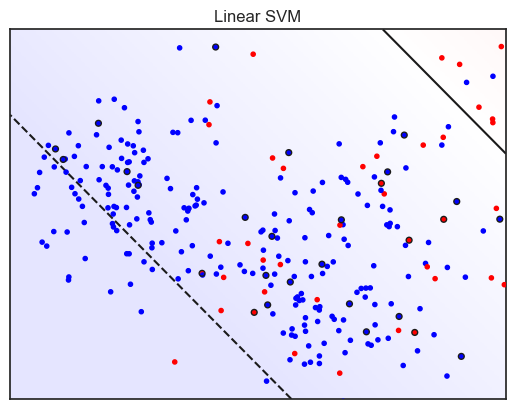

In [148]:
sample_size = 300

plot_svm_kernel(X_reduced[:sample_size,], y_train[:sample_size,], "Linear SVM",support_vectors[:30,],clf1.decision_function)

### Task 4 : Kernalization
It can be seen from the above plots that the LinearSVC was clearly struggling to discern the riperian and coniferous vegetation. Also, the relationship between the components of the data seems quite non-linear. Thus, to better capture the relationship, we will explore different kernel functions for the support vector classifier (`SVC`).

**Instructions**:
- Read the documentation of the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class from the `.svm` library provided by `sklearn`.
- Define two SVM models `clf2` and `clf3`. For `clf2`, use a polynomial kernel and for `clf3` a radial basis function (rbf) kernel.
- Fit the models on `X_reduced` and `y_train`.
- Extract the support vectors from `clf2` in `support_vectors_clf2` using the `.support_vectors_` method. Similarly, stire the support vectors of `clf3` in `support_vectors_clf3`.
- Call the `plot_svm_kernel` function and pass the respective arguments to visualize the model.
- Based on these visualisations, write your analysis.

In [18]:
from sklearn.svm import SVC
##Write your code here

clf2 = SVC(kernel='poly',C=0.001, max_iter = 10000)
clf2.fit(X_reduced, y_train)

support_vectors_clf2 = clf2.support_vectors_
decision_function = clf2.decision_function(X_reduced)


/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


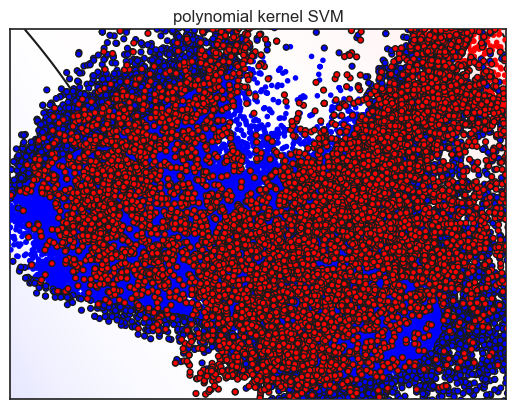

In [19]:
##clf2
sample_size = 300

plot_svm_kernel(X_reduced, y_train, "polynomial kernel SVM",support_vectors_clf2,clf2.decision_function,clf2.dual_coef_)

/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


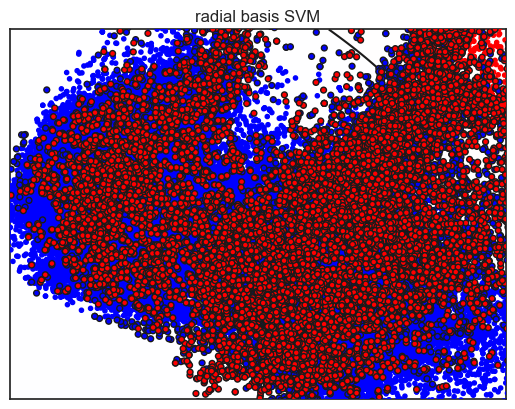

In [21]:
##clf3

clf3 = SVC(kernel='rbf',C=0.001, max_iter = 10000)
clf3.fit(X_reduced, y_train)

support_vectors_clf3 = clf3.support_vectors_
decision_function = clf3.decision_function(X_reduced)

plot_svm_kernel(X_reduced, y_train, "radial basis SVM",support_vectors_clf3,clf3.decision_function,clf3.dual_coef_)

#### Write your analysis here:

Depending on kernels, support vectors and hyperplane is changed. But the data points are scattered, it's hard to decide which one is the best with bare eyes. 



### Task 5 : Reciever Operator Charectarisitic

We will now empirically understand the performance of our model. Remember the discussion on ROC metric in Assignment 5.  The ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.
- **ROC AUC Value**:
   - An AUC of 1.0 is a perfect score, meaning that the model has perfect discrimination.
   - An AUC of 0.5 suggests no discrimination ability, equivalent to random guessing.
   - An AUC less than 0.5 suggests worse than random guessing, indicating a problem with the model.
   - Values between 0.5 and 1.0 indicate varying levels of performance, with values closer to 1.0 representing a better model.


**Instructions**:
- Make predictions using the linear , polynomial and rbf SVM classifiers trained on the `X_reduced` and `y_train` dataset.
- Compare the train and test `roc_auc_score` for the $3$ classifiers and write your analysis.


In [169]:
from sklearn.metrics import roc_auc_score, f1_score

##Write your code here

models = [clf1, clf2, clf3]

for model in models:
    model.fit(X_reduced, y_train)
    score = model.decision_function(X_reduced)
    pred = model.predict(X_reduced)
    
    roc_auc = roc_auc_score(y_train, score)
    f1 = f1_score(y_train, pred)
    print(f"Model: {model.__class__.__name__}, ROC AUC: {roc_auc}, F1 Score: {f1}")

    
    from sklearn.metrics import roc_auc_score, f1_score

/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model: LinearSVC, ROC AUC: 0.751865474225745, F1 Score: 0.4605118023384072


/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model: SVC, ROC AUC: 0.7654916553617478, F1 Score: 0.503620912006878


/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model: SVC, ROC AUC: 0.6347771460864339, F1 Score: 0.48573680063041763


### Task 6 : Hyperparameter Optimisation (GridSearchCV)

- Define a dictionary `param_svc` containing the hyperparameters you want to tune for the `SVC` (Support Vector Classifier) model. In this case, you're tuning the `kernel` type (with options 'linear', 'poly', 'rbf') and the regularization parameter `C` across 4 values viz 0.001, 1, 10, 100.

- Use `GridSearchCV` from scikit-learn, specifying the model (`SVC()`), the parameter grid (`param_svc`), and other settings like `cv=3` for 3-fold cross-validation. You also enable parallel processing with `n_jobs=-1` and set `verbose=True` to get more detailed output during the process. Set the scoring function as `roc_auc`
- Perform grid search over a reduced sample of your training data (`X_reduced[:sample_size,]`, `y_train[:sample_size,]`) to find the best hyperparameter combination based on cross-validated performance. `sample_size= 300`.
- Extract the results of the grid search into a pandas DataFrame for easier analysis.
- Sort the results based on `rank_test_score` to bring the best-performing hyperparameters to the top, and then reset the DataFrame index for neatness.
- Extract the best hyperparameter combination from the sorted DataFrame.
- Initialize an `SVC` model with the best-found hyperparameters and train it on the entire reduced dataset (`X_reduced`, `y_train`).
- Call a custom function `plot_svm_kernel` to visualize the decision boundary of the best-performing SVC model and pass the respective arguments as done before.

In [172]:
from sklearn.model_selection import GridSearchCV

##Write your code here

param_svc = {'kernel':['linear','poly','rbf'], 'C':[0.001,1,10,100]}
grid_search = GridSearchCV(SVC(), param_grid = param_svc, scoring = 'roc_auc', n_jobs=-1, verbose=True)
sample_size = 300
grid_search.fit(X_reduced[:sample_size,], y_train[:sample_size,])


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='roc_auc', verbose=True)

In [179]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values(by='rank_test_score').reset_index()
results_df = results_df.drop(['index'], axis=1)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002588,0.001342,0.000800,0.000068,1,poly,"{'C': 1, 'kernel': 'poly'}",0.704327,0.923077,0.612981,0.841346,0.716776,0.759701,0.109356,1
1,0.009940,0.004435,0.000933,0.000456,10,poly,"{'C': 10, 'kernel': 'poly'}",0.704327,0.913462,0.612981,0.841346,0.716776,0.757778,0.106513,2
2,0.066250,0.011477,0.000712,0.000039,100,poly,"{'C': 100, 'kernel': 'poly'}",0.704327,0.913462,0.612981,0.841346,0.716776,0.757778,0.106513,2
3,0.000925,0.000551,0.000979,0.000536,1,linear,"{'C': 1, 'kernel': 'linear'}",0.793269,0.923077,0.550481,0.687500,0.793028,0.749471,0.124412,4
4,0.011568,0.003891,0.000632,0.000060,100,linear,"{'C': 100, 'kernel': 'linear'}",0.764423,0.925481,0.550481,0.694712,0.786492,0.744318,0.122504,5
5,0.003113,0.003387,0.002651,0.001608,0.001,poly,"{'C': 0.001, 'kernel': 'poly'}",0.699519,0.966346,0.524038,0.675481,0.782135,0.729504,0.144843,6
6,0.001734,0.000360,0.000701,0.000048,10,linear,"{'C': 10, 'kernel': 'linear'}",0.841346,0.882212,0.550481,0.451923,0.769063,0.699005,0.168430,7
7,0.001428,0.000498,0.000900,0.000047,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.718750,0.728365,0.538462,0.730769,0.542484,0.651766,0.090969,8
8,0.000595,0.000084,0.000812,0.000068,0.001,rbf,"{'C': 0.001, 'kernel': 'rbf'}",0.651442,0.778846,0.665865,0.697115,0.450980,0.648850,0.108330,9
9,0.002579,0.001342,0.001027,0.000581,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.572115,0.694712,0.543269,0.637019,0.697168,0.628857,0.062633,10


/var/folders/bs/qy9ssxdj1zg35_516gt13v7m0000gn/T/ipykernel_35018/3010575611.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none',


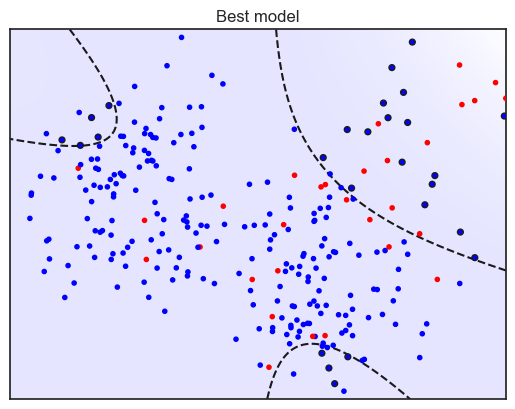

In [189]:
best_model = SVC(**grid_search.best_params_)
best_model.fit(X_reduced[:sample_size,], y_train[:sample_size,])

support_vectors = best_model.support_vectors_
decision_function = best_model.decision_function(X_reduced)

plot_svm_kernel(X_reduced[:sample_size,], y_train[:sample_size,], "Best model",support_vectors[:30,],best_model.decision_function)

### Saving the model


In [190]:
!pip install joblib

In [192]:
from joblib import dump

# Assuming 'best_model' is your trained model
#best_model = best_svc  # For example, if 'best_svc' is your best model found through GridSearchCV or any other method

# Save the model to disk
model_filename = 'best_model.joblib'
dump(best_model, model_filename)

print(f"Model saved to {model_filename}")




Model saved to best_model.joblib


### Loading a Saved Model

In [193]:
from joblib import load

# Load the model from disk
loaded_model = load(model_filename)

# Now you can use 'loaded_model' to make predictions
# For example: predictions = loaded_model.predict(X_test)


In [194]:
loaded_model

SVC(C=1, kernel='poly')